<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/2_Keras_Tensorflow_CNN_MNIST_Tutotial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Check if using GPU**

In [ ]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1371071944878964336
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12403226899051619891
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


**Inspecting our dataset**

In [ ]:
print("Shape of x_train: ", str(x_train.shape))

print("Number of samples in training data: " + str(len(x_train)))
print("Number of labels in training data: " + str(len(y_train)))
print("Number of samples in testing data: " + str(len(x_test)))
print("Number of labels in testing data: " + str(len(y_test)))

print("\n")
print("Dimensions of x_train: " + str(x_train[0].shape))
print("Labels in x_train: " + str(y_train.shape))

print("\n")
print("Dimensions of x_test: " + str(x_test[0].shape))
print("Labels in x_test: " + str(y_test.shape))

Shape of x_train:  (60000, 28, 28)
Number of samples in training data: 60000
Number of labels in training data: 60000
Number of samples in testing data: 10000
Number of labels in testing data: 10000


Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)


Dimensions of x_test: (28, 28)
Labels in x_test: (10000,)


**Visualizing the dataset**

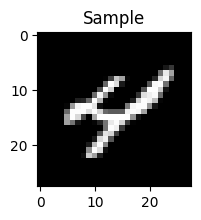

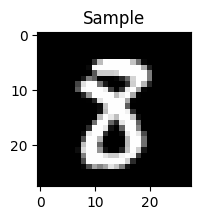

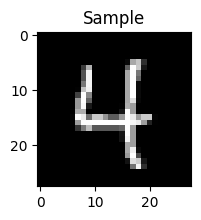

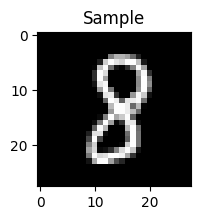

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define imshow function
def imshow(title = "", image = None, size = 6):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# Use OpenCV to show 4 random data
for i in range(0, 4):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  imshow("Sample", img, size=2)

**Using matplotlib for plotting**

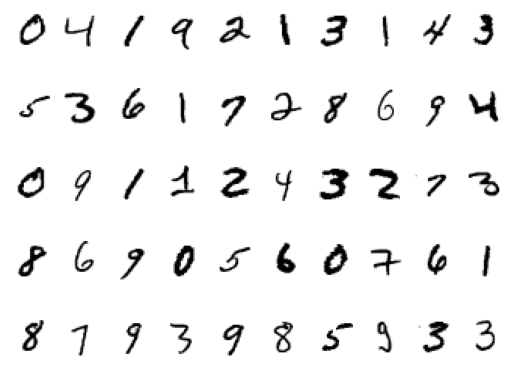

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images+1):
  plt.subplot(5, 10, index)
  plt.axis("off")
  plt.imshow(x_train[index], cmap = "gray_r")

**Preprocessing the data**

In [ ]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Keras requires a 4th dimension to be added to the input data
# We convert the shape from (60000, 28, 28) to (10000, 28, 28)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255.0
x_test /= 255.0

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


**One Hot Encoding**

In [ ]:
 from tensorflow.keras.utils import to_categorical

 y_train = to_categorical(y_train)
 y_test = to_categorical(y_test)

 print("Number of classes: " + str(y_test.shape[1]))

 num_classes = y_test.shape[1]
 num_pixels = x_train.shape[1] * x_train.shape[2]

Number of classes: 10


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001), metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

**Training our model**

In [ ]:
batch_size = 128
epochs = 25

history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/25
469/469 [==============================] - 14s 9ms/step - loss: 2.2375 - accuracy: 0.2625 - val_loss: 2.1326 - val_accuracy: 0.5033
Epoch 2/25
469/469 [==============================] - 4s 7ms/step - loss: 1.7727 - accuracy: 0.6862 - val_loss: 1.1720 - val_accuracy: 0.8053
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.7738 - accuracy: 0.8335 - val_loss: 0.5233 - val_accuracy: 0.8686
Epoch 4/25
469/469 [==============================] - 5s 10ms/step - loss: 0.4750 - accuracy: 0.8719 - val_loss: 0.4045 - val_accuracy: 0.8883
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4007 - accuracy: 0.8862 - val_loss: 0.3615 - val_accuracy: 0.8976
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3657 - accuracy: 0.8949 - val_loss: 0.3355 - val_accuracy: 0.9041
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3437 - accuracy: 0.9007 - val_loss: 0.3160 - val_accuracy: 0.9105
Epoc

**Plotting Loss Chart**

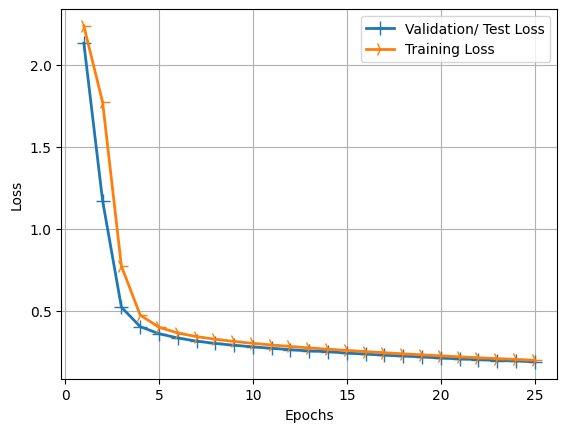

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/ Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

****Plotting Accuracy Chart****

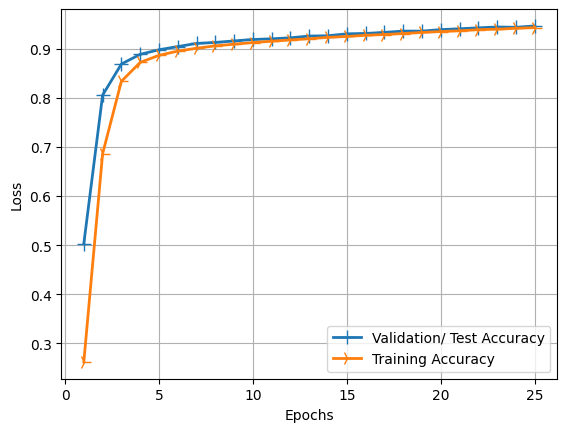

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/ Test Accuracy')
line2 = plt.plot(epochs, loss_values, label = 'Training Accuracy')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

**Saving and Loading the model**

In [ ]:
model.save('mnist_simple_cnn_25_Epochs.h5')
print('Model Saved')

Model Saved


In [ ]:
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_25_Epochs.h5')

**Getting Predictions**

In [ ]:
print(x_test.shape)

print('Predicting labels for all 10,000 images in test dataset...')

pred = np.argmax(classifier.predict(x_test), axis=-1)
print('Completed\n')

print(pred)
print(type(pred))
print(len(pred))

(10000, 28, 28, 1)
Predicting labels for all 10,000 images in test dataset...
313/313 [==============================] - 1s 2ms/step
Completed

[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


In [ ]:
input_img = x_test[0]
print(input_img.shape)

input_img = input_img.reshape(1, 28, 28, 1)
print(input_img.shape)

pred = np.argmax(classifier.predict(input_img), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 115ms/step
[7]
<class 'numpy.ndarray'>
1


1/1 [==============================] - 0s 74ms/step


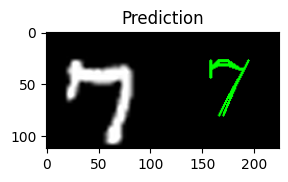

1/1 [==============================] - 0s 21ms/step


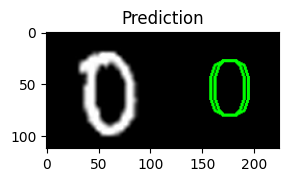

1/1 [==============================] - 0s 19ms/step


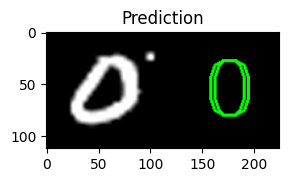

1/1 [==============================] - 0s 21ms/step


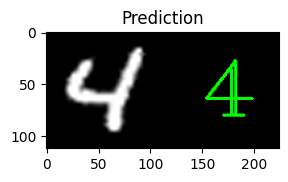

1/1 [==============================] - 0s 21ms/step


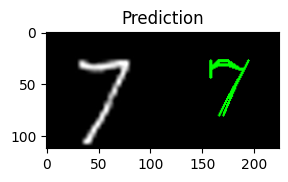

1/1 [==============================] - 0s 18ms/step


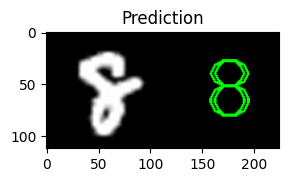

1/1 [==============================] - 0s 19ms/step


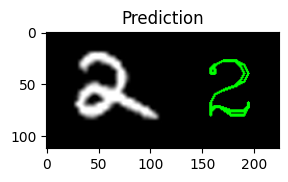

1/1 [==============================] - 0s 22ms/step


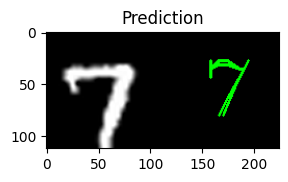

1/1 [==============================] - 0s 18ms/step


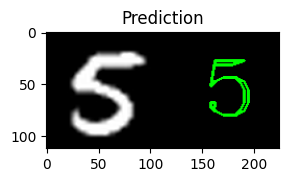

1/1 [==============================] - 0s 21ms/step


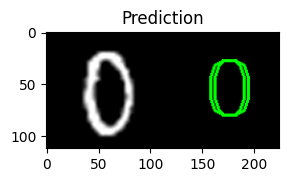

In [ ]:
import cv2
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def draw_test(name, pred, input_im):
  BLACK = [0,0,0]
  expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value = BLACK)
  expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
  cv2.putText(expanded_image, str(pred), (150, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
  imshow(name, expanded_image)

for i in range(0, 10):
  rand = np.random.randint(0, len(x_test))

  input_im = x_test[rand]

  imageL = cv2.resize(input_im, None, fx = 4, fy = 4, interpolation = cv2.INTER_CUBIC)
  input_im = input_im.reshape(1, 28, 28, 1)

  res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])
  draw_test('Prediction', res, np.uint8(imageL))